**downloading the data**

In [ ]:
! curl http://files.grouplens.org/datasets/movielens/ml-latest-small.zip -o ml-latest-small.zip
# get movielens ratings and users dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0  2081k      0 --:--:-- --:--:-- --:--:-- 2081k


**extracting the data**

In [ ]:
import zipfile
with zipfile.ZipFile('ml-latest-small.zip', 'r') as zip_ref:
    zip_ref.extractall('data')
# extract the data

**mean, median number of ratings and drop nan values**

In [ ]:
import pandas as pd
# import movies and ratings along with first 5 entries
movies_df = movies_df = pd.read_csv('data/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('data/ml-latest-small/ratings.csv')

# remove nan values
movies_df = movies_df.dropna()
ratings_df = ratings_df.dropna()

# ratings_df[ratings_df['rating'] == 5.0].count()
ratings_counts = ratings_df['rating'].value_counts().sort_index()
median_rating = ratings_df['rating'].median()
mean_rating = ratings_df['rating'].mean()

n_ratings = len(ratings_df)
n_users = len(ratings_df['userId'].unique())
n_movies = len(ratings_df['movieId'].unique())

avg_ratings_per_user = n_ratings / n_users
avg_ratings_per_movie = n_ratings / n_movies

print("mean rating:" , mean_rating)
print("median rating:" , median_rating)
print("number of ratings:" , n_ratings)
print("number of users:" , n_users)
print("number of movies:" , n_movies)
print("average ratings per user:" , avg_ratings_per_user)
print("average ratings per movie:" , avg_ratings_per_movie)

mean rating: 3.501556983616962
median rating: 3.5
number of ratings: 100836
number of users: 610
number of movies: 9724
average ratings per user: 165.30491803278687
average ratings per movie: 10.369806663924312


**plot rating distribution**

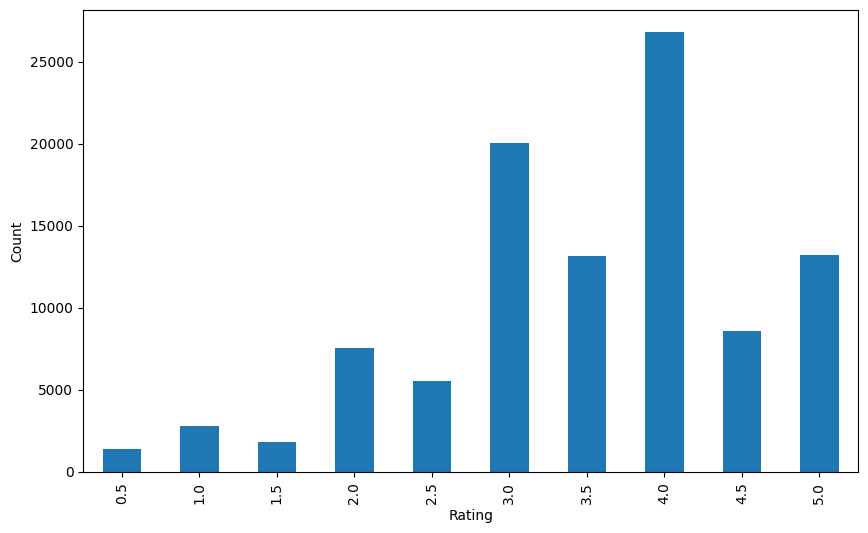

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ratings_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


**plot distribution of number of ratings per film**

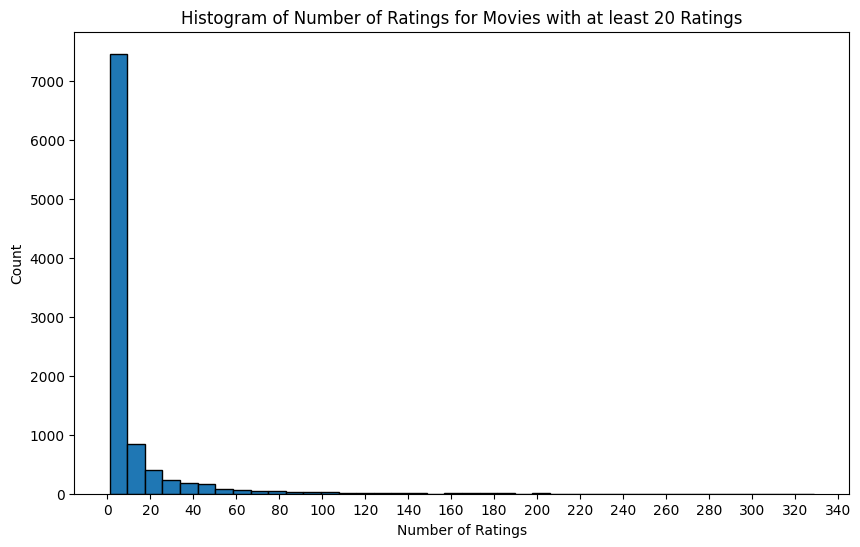

In [ ]:
no_movie_ratings = ratings_df.groupby('movieId')['rating'].count()
no_movie_ratings_filtered = no_movie_ratings[no_movie_ratings >= 50]

plt.figure(figsize=(10, 6))
plt.hist(no_movie_ratings, bins=40, edgecolor='black')

plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.title('Histogram of Number of Ratings for Movies with at least 20 Ratings')

max_rating = no_movie_ratings_filtered.max()
xticks = np.arange(0, max_rating + 20, 20)
plt.xticks(xticks)

plt.show()



**highest rated movies by mean**

In [ ]:
mean_ratings = ratings_df[ratings_df['movieId'].isin(no_movie_ratings_filtered.index)].groupby('movieId')['rating'].mean()
highest_rated_movies = mean_ratings.sort_values(ascending=False).head(10)

for movie_id, rating in highest_rated_movies.items():
    print(movies_df[movies_df['movieId'] == movie_id]['title'].iloc[0], rating, no_movie_ratings[movie_id])


Shawshank Redemption, The (1994) 4.429022082018927 317
Godfather, The (1972) 4.2890625 192
Fight Club (1999) 4.272935779816514 218
Cool Hand Luke (1967) 4.271929824561403 57
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) 4.268041237113402 97
Rear Window (1954) 4.261904761904762 84
Godfather: Part II, The (1974) 4.25968992248062 129
Departed, The (2006) 4.252336448598131 107
Goodfellas (1990) 4.25 126
Casablanca (1942) 4.24 100


**creating bayesian average function**

In [ ]:
movie_stats = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])
count = movie_stats['count'].mean()
mean = movie_stats['mean'].mean()
print(count, mean)

def bayesian_average(ratings):
    bayesian_avg = (count * mean + ratings.sum()) / (count + ratings.count())
    return round(bayesian_avg, 3)

test = pd.Series([1, 2, 3, 4, 5])
bayesian_average(test)

10.369806663924312 3.262448274810963


3.177

**ordering films by bayesian average**

In [ ]:
bayesian_ratings = ratings_df.groupby('movieId')['rating'].agg(bayesian_average)
bayesian_ratings.head()
highest_rated_movies = bayesian_ratings.sort_values(ascending=False).head(10)

print("Highest Rated Movies:")
for movie_id, rating in highest_rated_movies.items():
    print(movies_df[movies_df['movieId'] == movie_id]['title'].iloc[0], rating, no_movie_ratings[movie_id])

lowest_rated_movies = bayesian_ratings.sort_values(ascending=True).head(10)

print("\nLowest Rated Movies:")
for movie_id, rating in lowest_rated_movies.items():
    print(movies_df[movies_df['movieId'] == movie_id]['title'].iloc[0], rating, no_movie_ratings[movie_id])

Highest Rated Movies:
Shawshank Redemption, The (1994) 4.392 317
Godfather, The (1972) 4.236 192
Fight Club (1999) 4.227 218
Star Wars: Episode IV - A New Hope (1977) 4.193 251
Usual Suspects, The (1995) 4.191 204
Godfather: Part II, The (1974) 4.185 129
Schindler's List (1993) 4.182 220
Dark Knight, The (2008) 4.175 149
Goodfellas (1990) 4.175 126
Star Wars: Episode V - The Empire Strikes Back (1980) 4.171 211

Lowest Rated Movies:
Speed 2: Cruise Control (1997) 2.19 19
Battlefield Earth (2000) 2.224 19
Godzilla (1998) 2.267 33
Anaconda (1997) 2.297 27
Superman IV: The Quest for Peace (1987) 2.307 16
Spice World (1997) 2.324 10
Jason X (2002) 2.359 8
Problem Child (1990) 2.362 12
Catwoman (2004) 2.366 9
Wild Wild West (1999) 2.38 53


In [ ]:
movies_df.head()
# movies have genres, title and id

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_df.head()
# ratings have userId, movieId and rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**how many movies and users?**

In [ ]:
no_users = ratings_df['userId'].nunique()
no_movies = ratings_df['movieId'].nunique()
print(no_users, no_movies)

610 9724


**get genres as a list**

In [ ]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


**plot genre frequency**

Text(0, 0.5, 'Count')

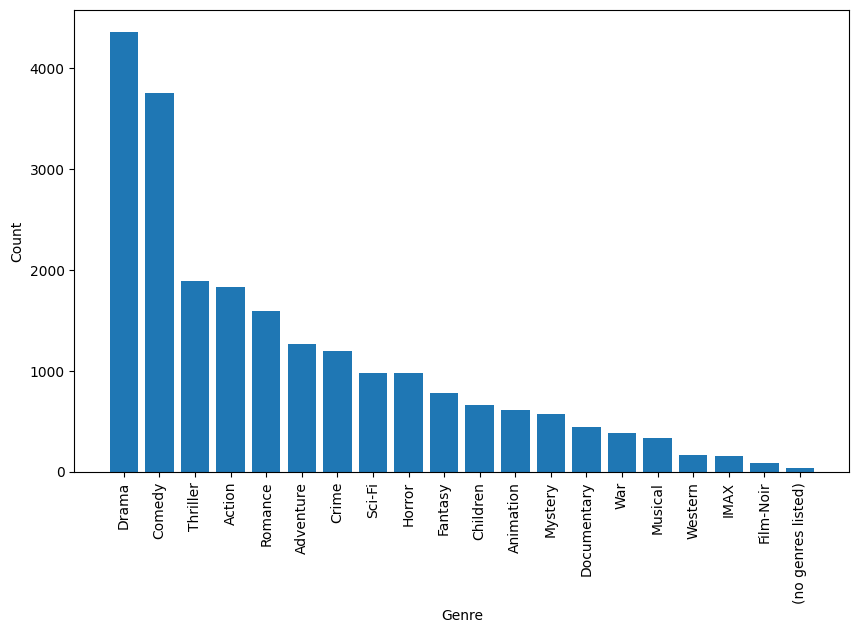

In [ ]:
from collections import Counter

genre_frequency = Counter()
for genres in movies_df['genres']:
    genre_frequency.update(genres)

genre_frequency.most_common(10)

genre_frequency_df = pd.DataFrame(genre_frequency.most_common(), columns=['genre', 'count'])
genre_frequency_df

plt.figure(figsize=(10, 6))
plt.bar(genre_frequency_df['genre'], genre_frequency_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')


**find closest match to title**

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies_df['title'].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]

print(movie_finder("jumanji"))

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Jumanji (1995)


**remove the year from the titles**

In [ ]:
import re

def remove_year(title):
  return re.sub(r'\(\d{4}\)', '', title).strip()

movies_df['title'] = movies_df['title'].apply(remove_year)

**map movie id to titles and titles to movie id**



In [ ]:
id_to_titles = movies_df.set_index('movieId')['title'].to_dict() # map movieId to title
print(id_to_titles.values())
titles_to_id = movies_df.set_index('title')['movieId'].to_dict() # map movie title to movieId
print(titles_to_id.values())

dict_values(['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Heat', 'Sabrina', 'Tom and Huck', 'Sudden Death', 'GoldenEye', 'American President, The', 'Dracula: Dead and Loving It', 'Balto', 'Nixon', 'Cutthroat Island', 'Casino', 'Sense and Sensibility', 'Four Rooms', 'Ace Ventura: When Nature Calls', 'Money Train', 'Get Shorty', 'Copycat', 'Assassins', 'Powder', 'Leaving Las Vegas', 'Othello', 'Now and Then', 'Persuasion', 'City of Lost Children, The (Cité des enfants perdus, La)', 'Shanghai Triad (Yao a yao yao dao waipo qiao)', 'Dangerous Minds', 'Twelve Monkeys (a.k.a. 12 Monkeys)', 'Babe', 'Dead Man Walking', 'It Takes Two', 'Clueless', 'Cry, the Beloved Country', 'Richard III', 'Dead Presidents', 'Restoration', 'Mortal Kombat', 'To Die For', 'How to Make an American Quilt', 'Seven (a.k.a. Se7en)', 'Pocahontas', 'When Night Is Falling', 'Usual Suspects, The', 'Mighty Aphrodite', 'Lamerica', 'Big Green, The', 'Georgia', 'Home for the

# **Using embedding layers in neural net**

> create the custom dataset and dataloader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class MovieLensDataset(Dataset):
    def __init__(self, ratings_df):
        self.ratings = ratings_df  # No copy needed

        # Extract unique user IDs and movie IDs
        self.users = self.ratings['userId'].unique()
        self.movies = self.ratings['movieId'].unique()

        # Map user IDs and movie IDs to indices
        self.user_to_idx = {u: i for i, u in enumerate(self.users)}
        self.movie_to_idx = {m: i for i, m in enumerate(self.movies)}

        # Convert IDs to indices
        self.ratings['user_idx'] = self.ratings['userId'].map(self.user_to_idx)
        self.ratings['movie_idx'] = self.ratings['movieId'].map(self.movie_to_idx)

        # map indices to IDs to get info on movies
        self.idx_to_user = {v: k for k, v in self.user_to_idx.items()}
        self.idx_to_movie = {v: k for k, v in self.movie_to_idx.items()}

        self.x = self.ratings[['user_idx', 'movie_idx']].values # features (user movie pairs)
        self.y = self.ratings['rating'].values # labels (ratings)
        self.x, self.y = torch.tensor(self.x, dtype=torch.long), torch.tensor(self.y, dtype=torch.float)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

dataset = MovieLensDataset(ratings_df)
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

**create the neural network with embedding layers**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data_utils

class MatrixFactorization(nn.Module):
  def __init__(self, num_users, num_movies, num_factors=15):
    # num_factors represents number of hidden attributes e.g genres in the movies to be learnt - similar to hidden units in a linear layer
    super().__init__()
    self.user_factors = nn.Embedding(num_users, num_factors) # user embeddings represent vector profile of how much they like each attribute i.e genre
    self.movie_factors = nn.Embedding(num_movies, num_factors) # movie embeddings represent how much each movie fits into an attribute
    # self.user_factors.weight.data.uniform_(0, 0.1)
    # self.movie_factors.weight.data.uniform_(0, 0.1) # initialise embeddings for users and movies with small random values

  def forward(self, data):
    users, movies = data[:, 0], data[:, 1] # user movie pairs (first and second column of data)

    return (self.user_factors(users) * self.movie_factors(movies)).sum(1) # return cross product of users and movies
    # think of it as multiplying the user's unique taste profile and the movie's unique characteristics profile

  def predict(self, user, movie):
    return self.forward(user, movie)


**setup loss function and optimizers**

In [ ]:
num_epochs = 100
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

print(no_users, no_movies)
model = MatrixFactorization(no_users, no_movies).to(device)

loss_fn = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

610 9724


**train model**

In [ ]:

model.train()

for epoch in range(num_epochs):
  losses = []
  for x, y in dataloader:

    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    y_preds = model(x)
    loss = loss_fn(y_preds, y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch+1}, Loss: {np.mean(losses)}')


Epoch 1, Loss: 27.394919371241844
Epoch 2, Loss: 24.647124672904233
Epoch 3, Loss: 22.43739256398932
Epoch 4, Loss: 20.662395397418646
Epoch 5, Loss: 19.212242755793074
Epoch 6, Loss: 18.01380336587199
Epoch 7, Loss: 17.006646376575915
Epoch 8, Loss: 16.144305139628763
Epoch 9, Loss: 15.389124216767131
Epoch 10, Loss: 14.705182305447341
Epoch 11, Loss: 14.059305909926517
Epoch 12, Loss: 13.414877136346652
Epoch 13, Loss: 12.73629228233686
Epoch 14, Loss: 11.980716313202368
Epoch 15, Loss: 11.110603557625398
Epoch 16, Loss: 10.105637545513018
Epoch 17, Loss: 8.97649338402724
Epoch 18, Loss: 7.780462855614987
Epoch 19, Loss: 6.609993290780159
Epoch 20, Loss: 5.5505558270488295
Epoch 21, Loss: 4.653090779551395
Epoch 22, Loss: 3.921964405151793
Epoch 23, Loss: 3.3362946740261794
Epoch 24, Loss: 2.867390957883167
Epoch 25, Loss: 2.489744288969766
Epoch 26, Loss: 2.1824102988702996
Epoch 27, Loss: 1.9305089899731167
Epoch 28, Loss: 1.7217247537549982
Epoch 29, Loss: 1.5475207077065094
Epoch

**create trained movie embeddings**

In [ ]:
trained_movie_embeddings = model.movie_factors.weight.data.cpu().numpy()
print(len(trained_movie_embeddings))
print(trained_movie_embeddings.shape)

9724
(9724, 15)


In [ ]:
from sklearn.neighbors import NearestNeighbors
import re
from itertools import islice

def find_similar_movies(movie_id, k=10, metric='cosine'):
  movie_idx = dataset.movie_to_idx[movie_id] # convert the id to an index to lookup in the embedding
  movie_embedding = trained_movie_embeddings[movie_idx] # get the embedding i.e a characteristic profile from the movie embeddings
  nbrs = NearestNeighbors(n_neighbors=k+1, metric=metric).fit(trained_movie_embeddings) # get the closest neighbours i.e most similar movies
  distances, indices = nbrs.kneighbors([movie_embedding])
  for i in range(0, len(indices.flatten())):
    if indices.flatten()[i] == movie_idx:
      indices = indices.flatten()[i+1:]
      distances = distances.flatten()[i+1:]
      break
  return [(id_to_titles[dataset.idx_to_movie[idx]], distances[i]) for i, idx in enumerate(indices)]


title = "thor"
title = movie_finder(title)
id = titles_to_id[title]

similar_movies = find_similar_movies(id)
print("Similar Movies to " + title)
for mov in similar_movies:
  print(mov)

Similar Movies to Thor
('I Know What You Did Last Summer', 0.14115721)
('Brave', 0.16263878)
('Harry Potter and the Half-Blood Prince', 0.1797452)
("Winchester '73", 0.1921745)
('Scenes from the Class Struggle in Beverly Hills', 0.19294178)
('Groundhog Day', 0.19923824)
('Office Space', 0.2003308)
("Bill & Ted's Excellent Adventure", 0.20704585)
('Few Good Men, A', 0.21263719)
('Wizard of Oz, The', 0.21374702)


# **Using sparsity matrix**

> placeholder



In [ ]:
from scipy.sparse import csr_matrix
# csr_matrix is a sparse matrix i.e where most elements are 0
# we create a matrix of users and movies, with squares representing their ratings
# this does not yet include latent factors

# create utility matrix of users and items
def create_utility_matrix(df):

    n_users = df['userId'].nunique()
    n_movies = df['movieId'].nunique()

    user_to_idx = {u:i for i, u in enumerate(df["userId"].unique())} # map users to numerical index
    movie_to_idx = {m:i for i, m in enumerate(df["movieId"].unique())} # map movies to numerical index

    idx_to_user = {v:k for k, v in user_to_idx.items()} # map index to user id
    idx_to_movie = {v:k for k, v in movie_to_idx.items()} # map index to movie id

    user_index = [user_to_idx[i] for i in df['userId']] # get the index of the user
    movie_index = [movie_to_idx[i] for i in df['movieId']] # get the index of the movie

    X = csr_matrix((df["rating"], (user_index, movie_index)), shape=(n_users, n_movies)) # create utility matrix of users and movies with their ratings

    return X, user_to_idx, movie_to_idx, idx_to_user, idx_to_movie



X, user_to_idx, movie_to_idx, idx_to_user, idx_to_movie = create_utility_matrix(ratings_df)
print(X.shape)

(610, 9724)


In [ ]:
n_ratings = X.nnz
n_total = X.shape[0] * X.shape[1]
density = (n_ratings / n_total) * 100
print(f"Density: {density:.2f}%")

Density: 1.70%


In [ ]:
from sklearn.neighbors import NearestNeighbors
import re
from itertools import islice

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.

    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar movie ID's
    """
    X = X.T # get the transpose of utility matrix X since kNN expects input to be users as columns and movies to be rows
    neighbour_ids = [] # initialise neighbours list

    movie_idx = movie_to_idx[movie_id] # get the index of the movie we are finding similar movies for
    movie_vec = X[movie_idx] # index X to get vector of all the users and their respective ratings for that movie
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1) # ensure movie vector is 2D (1 row and multiple columns, hence the -1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric) # find nearest neighbours using cosine similarity and brute force algorithm to find them
    kNN.fit(X) # fit kNN model to the transpose of X - each row in X represents a movie's vector of user ratings
    neighbours = kNN.kneighbors(movie_vec, return_distance=False) # get the nearest neighbours
    for i in range(0,k):
        n = neighbours.item(i)
        neighbour_ids.append(idx_to_movie[n]) # add the movie id (converted from index) to the list
    neighbour_ids.pop(0)
    return neighbour_ids

title = movie_finder("titanic")
id = titles_to_id[title]

similar_movies = find_similar_movies(id, X, movie_to_idx, idx_to_movie, k=10)
print("Similar Movies to " + title)
for mov in similar_movies:
  print(id_to_titles[mov])

Similar Movies to Titanic
Pajama Game, The
Crimson Pirate, The
Let's Get Harry
Death Wish 5: The Face of Death
Death Wish 4: The Crackdown
Tarzan and the Lost City
Deceiver
In Search of the Castaways
Bustin' Loose


In [ ]:
genres = movies_df['genres'].str.split('|').explode()
genres = genres.unique()
for g in genres:
  movies_df[g] = movies_df['genres'].apply(lambda x: 1 if g in x else 0) # create col for each genre (one hot tensor)
movies_df.head()

,movieId,title,genres,NaN
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0
1,2,Jumanji,"[Adventure, Children, Fantasy]",0
2,3,Grumpier Old Men,"[Comedy, Romance]",0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",0
4,5,Father of the Bride Part II,[Comedy],0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

movie_genres = movies_df.drop(['movieId', 'title', 'genres'], axis=1).values

cosine_sim = cosine_similarity(movie_genres, movie_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")
n_recommendations=10
idx = movies_df[movies_df['title'] == title].index[0]
print(idx)
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:n_recommendations+1]
movie_indices = [i[0] for i in sim_scores]
print(movie_indices)


Dimensions of our genres cosine similarity matrix: (9742, 9742)
1291
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
print("Recommendations for " + title)
for i in movie_indices:
    print(movies_df.iloc[i]['title'])

Recommendations for Titanic
Jumanji
Grumpier Old Men
Waiting to Exhale
Father of the Bride Part II
Heat
Sabrina
Tom and Huck
Sudden Death
GoldenEye
American President, The


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=30, n_iter=5)
# 30 latent factors, 5 iterations of the singular value decomposition algorithm
Q = svd.fit_transform(X.T)
# fit svd model to the data and return matrix
# rows represent movies and columns represent latent factors
print(Q.shape)

(9724, 30)


In [ ]:
title = movie_finder("home alone")
movie_id = titles_to_id[title]
similar_movies = find_similar_movies(movie_id, Q.T, movie_to_idx, idx_to_movie, k=10)
# find movies with most similar latent factors
print("Similar Movies to " + id_to_titles[movie_id])
for mov in similar_movies:
  print(id_to_titles[mov])

Similar Movies to Home Alone
Aladdin
Lion King, The
Mrs. Doubtfire
Beauty and the Beast
Jumanji
Mask, The
Ace Ventura: Pet Detective
Dumb & Dumber (Dumb and Dumber)
Snow White and the Seven Dwarfs
